### Classification Performance Measure: Confusion Matrix

Confusion Matrix: The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.


Confusion Matrix:

Predicted T/Actual True = True Positive   P(d=1 | Y=1)
Predicted F/Actual False = True Negative
Predicted T/Actual False = False Positive  P(d=1 | Y=0)
Predicted F/Actual True = False Negative


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
# import iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# todo: Split the data into a training set (75%) and a test set (25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [4]:
print(X_train.shape[0], X_test.shape[0])
#112 data points for training, 38 for testing

112 38


In [5]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results: 
#as model becomes more complicated, you 
#will have better AUC but it wouldnt geenerate to validation set. 
#pick a C that gives you the best validation performance****

classifier = svm.SVC(kernel='linear', C=0.01) #using linear SVM with very low regularizer

# todo: fit and predict test set
y_pred = classifier.fit(X_train,y_train).predict(X_test) 
#fit to training set and predict test


In [6]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [7]:
# todo: compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred) 

#rows(y-axis) are true labels, columns(x-axis) predicted labels

In [8]:

cnf_matrix

array([[13,  0,  0],
       [ 0, 10,  6],
       [ 0,  0,  9]])

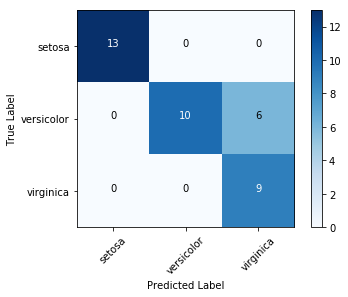

In [9]:
# plot confusion matrix
colormap = plt.cm.Blues #other color maps: see Resources
# imshow
plt.imshow(cnf_matrix, interpolation='nearest', cmap=colormap) #interpolation: see Resources

# add colorbar
plt.colorbar()

#add tick marks: plt.xticks(position, names, rotation)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thres = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], 'd'), 
                 horizontalalignment="center",
                 color = 'white' if cnf_matrix[i,j] > thres else 'black')

In [10]:
format(2,'d')

'2'

In [11]:
format(2,'.2f')

'2.00'

In [12]:
format('hey','s')

'hey'

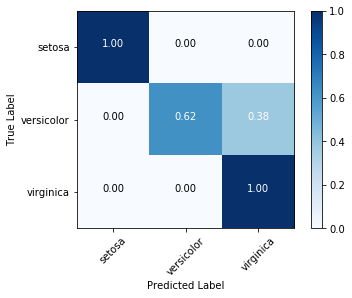

In [13]:
# plot normalized confusion matrix

# todo: 1. create normalized confusion matrix
from sklearn.preprocessing import normalize
norm_cnf_matrix = normalize(cnf_matrix, 'l1', axis = 1) 
#L1 means normalize by sum
#L2 means square root of sum of squares (normalize by distance)

#2. plot confusion matrix

## set colormap 
colormap = plt.cm.Blues

## imshow
plt.imshow(norm_cnf_matrix, interpolation='nearest', cmap=colormap)

## add colorbar
plt.colorbar()

## add tick marks
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## todo: add text
thres = norm_cnf_matrix.max() / 2.
for i, j in itertools.product(range(norm_cnf_matrix.shape[0]), range(norm_cnf_matrix.shape[1])):
    plt.text(j, i, format(norm_cnf_matrix[i, j], '.2f'), 
        horizontalalignment="center",     
        color = 'white' if cnf_matrix[i,j] > thres else 'black')

In [14]:
## practice: create a function for plotting confusion matrix

### Classification Performance Measure 2: ROC

ROC typically feature true positive rate on the Y axis, and false
positive rate on the X axis. This means that the top left corner of the plot is
the "ideal" point - a false positive rate of zero, and a true positive rate of
one. This is not very realistic, but it does mean that a larger area under the
curve (AUC) is usually better.

The "steepness" of ROC curves is also important, since it is ideal to maximize
the true positive rate while minimizing the false positive rate.

#### Multiclass settings

ROC curves are typically used in binary classification to study the output of
a classifier. In order to extend ROC curve and ROC area to multi-class
or multi-label classification, it is necessary to binarize the output. One ROC
curve can be drawn per label, but one can also draw a ROC curve by considering
each element of the label indicator matrix as a binary prediction
(micro-averaging).

Another evaluation measure for multi-class classification is
macro-averaging, which gives equal weight to the classification of each
label.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [16]:
# Import iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
# binarize output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [18]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training (50%) and test sets (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [19]:
#what it believes the accuracy of each prediction per data point to be
#we can rank the scores

y_score

array([[-0.76301132, -0.36482547,  0.12386354],
       [-0.20224493, -0.63144366, -0.16612302],
       [ 0.11801481, -0.80263073, -0.32055874],
       [-0.90780855, -0.12395478,  0.02199789],
       [-0.01116192, -0.27913475, -0.71889214],
       [-0.6048727 , -0.34730509, -0.05859016],
       [ 0.02283491, -0.24506467, -0.79111998],
       [-0.61076876,  0.18264917, -0.57199363],
       [-0.37572754, -0.24059516, -0.38933694],
       [-0.47017411, -0.25745136, -0.27510839],
       [-0.42224234, -0.30270719, -0.27995197],
       [-0.3355867 , -0.7030665 ,  0.02530178],
       [-0.22723929, -0.64062258, -0.13456902],
       [-0.07856729, -0.46354017, -0.45918364],
       [-0.53383361, -0.2653183 , -0.20023832],
       [ 0.12163662, -0.56706353, -0.56980985],
       [-0.71356947, -0.04226738, -0.24297128],
       [-0.55111511, -0.13784913, -0.31370595],
       [ 0.37991331, -0.99673302, -0.39090964],
       [-0.11107635, -0.91349462,  0.03129167],
       [-0.70713712, -0.06436533, -0.214

In [20]:
# roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


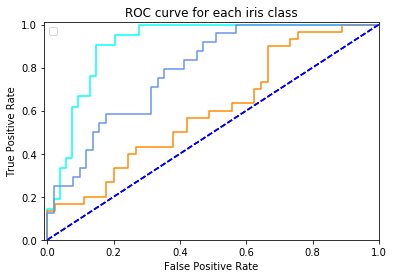

In [38]:
#plot roc for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']

for i, color in zip(range(n_classes), colors):
    #todo: plot roc curve for each class and label AUC
    plt.plot(fpr[i],tpr[i], color=color),
    label = 'ROC curce for class {c}, auc = {auc_0: .2f}', format(colors)
    
    #45 degree line -- useless classifier
    plt.plot([0,1], [0,1], '--', c = 'blue')
    
    #additional settings to figure
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.01])
    plt.legend()
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC curve for each iris class')

### Resources
0. [SKlearn Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)-- A thorough list of performance measures for Classification, Regression, and Clustering implemented in sklearn
1. Confusion Matrix
    1. DS for Business p.189 - 193
    2. https://en.wikipedia.org/wiki/Confusion_matrix
2. ROC, AUC: 
    1. DS for Business p.214 - 219
    2. https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve
3. [Matplotlib colormap](https://matplotlib.org/tutorials/colors/colormaps.html)
4. [Matplotlib imshow interpolation](https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html)